<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/GROUP12__DTI_ASSIGNMENT2_FINAL%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 150):
        partitions.append((words[i:i+150], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of different genre
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 150 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


In [3]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [4]:
data=pd.read_csv('book_partitions.csv')

In [5]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-5-f510ee5b3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]=1
<ipython-input-5-f510ee5b3d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]=2
<ipython-input-5-f510ee5b3d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][600:800]=3
<ipython-input-5-f510ee5b3d00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [6]:
data

,Text,Book Name,Author,label
0,then lifting his face to them again showed a ...,Moby Dick,Herman Melville,0
1,Deck First Night Watch CARPENTER STANDING B...,Moby Dick,Herman Melville,0
2,not properly belonging to the room there was ...,Moby Dick,Herman Melville,0
3,not this Vishnoo a whaleman then even as a m...,Moby Dick,Herman Melville,0
4,blows was sung out from the masthead Where...,Moby Dick,Herman Melville,0
...,...,...,...,...
995,the power of Beautie will sooner transforme H...,The Tragedie of Hamlet,William Shakespeare,4
996,Qu Oh speake to me no more These words like...,The Tragedie of Hamlet,William Shakespeare,4
997,I done that thou darst wag thy tong In noise...,The Tragedie of Hamlet,William Shakespeare,4
998,That I haue longed long to redeliuer I pray y...,The Tragedie of Hamlet,William Shakespeare,4


In [7]:
# ploting word cloud for the most frequent 20 words in each book  
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px


for label in data['label'].unique():
  books = data[data["label"]==label]["Text"]


# Creating  word cloud
  wc = wordcloud.WordCloud(background_color=None, max_words=20, 
                          max_font_size=100)
  wc = wc.generate(str(books))

# Converting  word cloud to dataframe
  words = list(wc.words_.keys())
  freq = [wc.words_[word] for word in words]
  data10 = {'words': words, 'freq': freq}
  df10 = pd.DataFrame(data10)

  # Creating  interactive word cloud
  fig = px.scatter(df10, x='words', y='freq', text='words', size='freq', color='freq')
  fig.update_layout(title='Interactive Word Cloud',
                    xaxis_title='Words',
                    yaxis_title='Frequency')
  fig.show()


 FREQUENT 50 WORDS IN BOOK  : Moby Dick



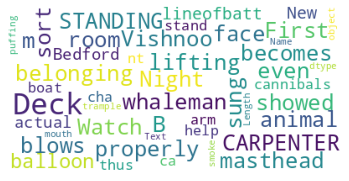


 FREQUENT 50 WORDS IN BOOK  : The Parent's Assistant



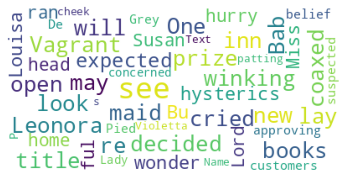


 FREQUENT 50 WORDS IN BOOK  : The Man Who Was Thursday



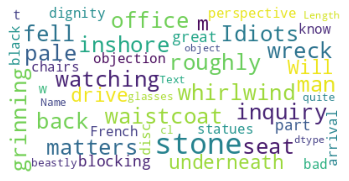


 FREQUENT 50 WORDS IN BOOK  : Emma



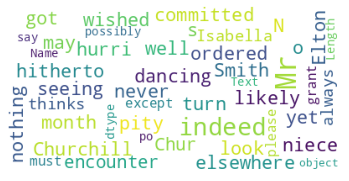


 FREQUENT 50 WORDS IN BOOK  : The Tragedie of Hamlet



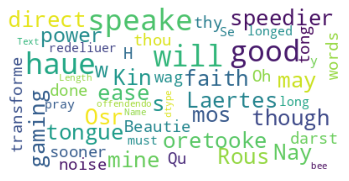

In [8]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in data['Book Name'].unique():
  books = data[data["Book Name"]==label]["Text"]

  #wordcloud 
  print(f"\n FREQUENT 50 WORDS IN BOOK  : {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

#

In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [10]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Clustered data points for X_train

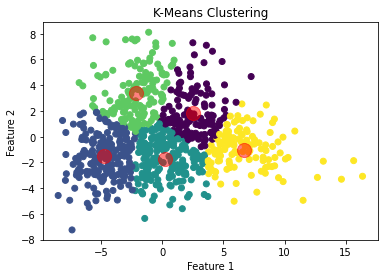

In [12]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Unclustered Raw datapoints of data

Clustered data points for X_test

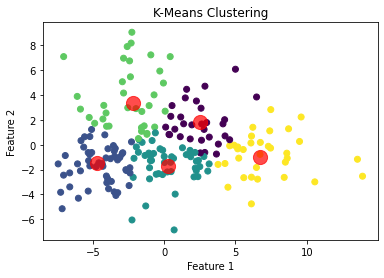

In [13]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMeans with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMeans with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMeans with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for KMeans with Bag of words is  0.3528351271063505
_________________________________________________________________________
kappa for KMeans with Bag of words is  0.06509803921568624
_________________________________________________________________________
Coherence for KMeans with Bag of words is: 0.09051372760108241
_________________________________________________________________________


In [15]:
from collections import Counter
def cluster_count(pred):
  cls_count = Counter(pred)
  plt.bar(cls_count.keys(), cls_count.values())
  cluster_count(x_pca_test)

#EM (GAUSSIAN MIXTURE ) 

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

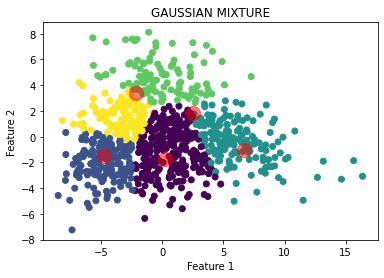

In [17]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Geting  the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

====UNCLUSTERED RAW DATA====


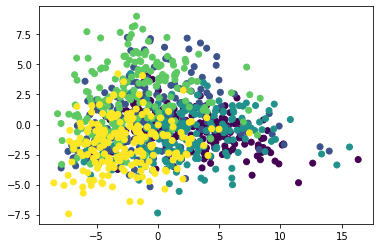

In [18]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


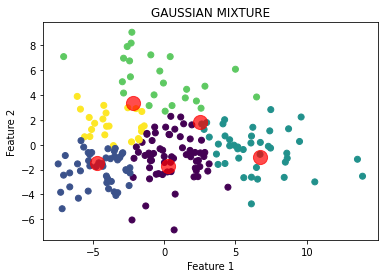

In [19]:
 print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for EM with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for EM with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for EM with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for EM with Bag of words is  0.3528357424242627
_________________________________________________________________________
kappa for EM with Bag of words is  0.1478509672202526
_________________________________________________________________________
Coherence for EM with Bag of words is: 0.07668198043260169
_________________________________________________________________________


#Heirarchial with Bag of words 


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

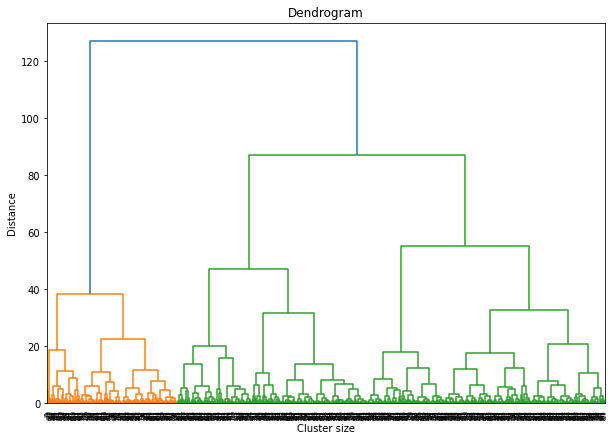

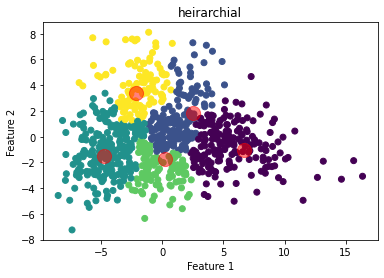

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Ploting  dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters since 5 books 
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)


labels = agg.labels_

print("==============================================================================================")


# Ploting  the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial")
plt.show()

====TEST DATA CLUSTER====


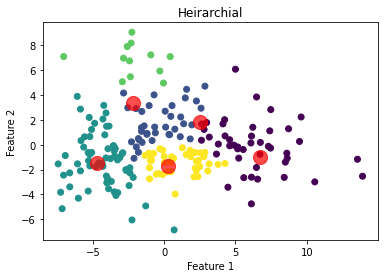

In [23]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Bag of words is  0.32142864233881013
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  0.04550984123023183
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.08869497419213172
_________________________________________________________________________


#TF-IDF k-means


In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [26]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

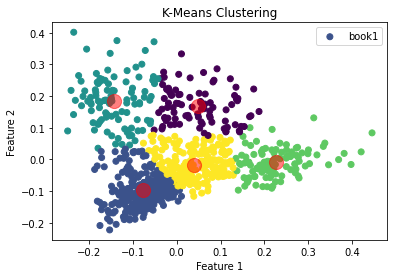

In [28]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.legend(["book1","book2","book3","book4","book5"])
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

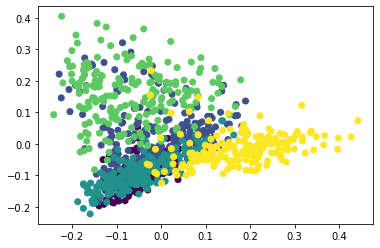

In [29]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

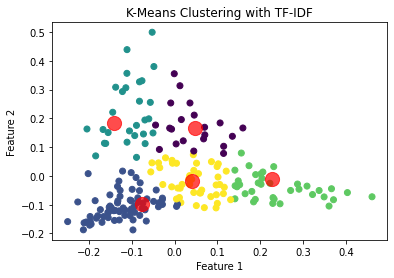

In [30]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with TF-IDF')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMEANS with TFIDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMEANS with TFIDF is ",kappa )
kktdf = kappa
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMEANS with TFIDF is:", ari)
print("_________________________________________________________________________")

Silhouette for KMEANS with TFIDF is  0.42005375076303586
_________________________________________________________________________
kappa for KMEANS with TFIDF is  -0.14072055515067006
_________________________________________________________________________
Coherence for KMEANS with TFIDF is: 0.27534572839611016
_________________________________________________________________________


#tfidf gmm


In [32]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

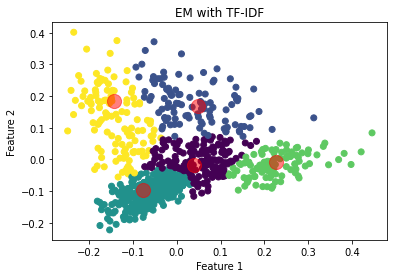

In [34]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Geting the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF')
plt.show()

====UNCLUSTERED RAW DATA====


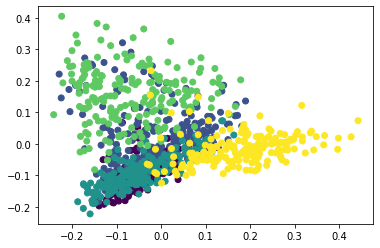

In [35]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


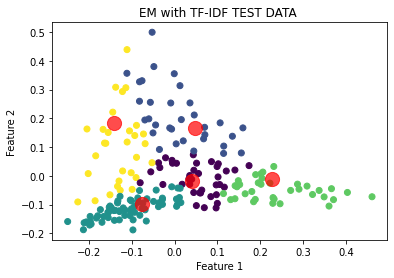

In [36]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF TEST DATA ')
plt.show()

In [37]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for GMM with TF-IDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for GMM with TF-IDF is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for GMM with TF-IDF is:", ari)
print("_________________________________________________________________________")

Silhouette for GMM with TF-IDF is  0.4200565868337442
_________________________________________________________________________
kappa for GMM with TF-IDF is  -0.007619343803452194
_________________________________________________________________________
Coherence for GMM with TF-IDF is: 0.29515392586753136
_________________________________________________________________________


#TFIDF HEIRARCHIAL 


In [38]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

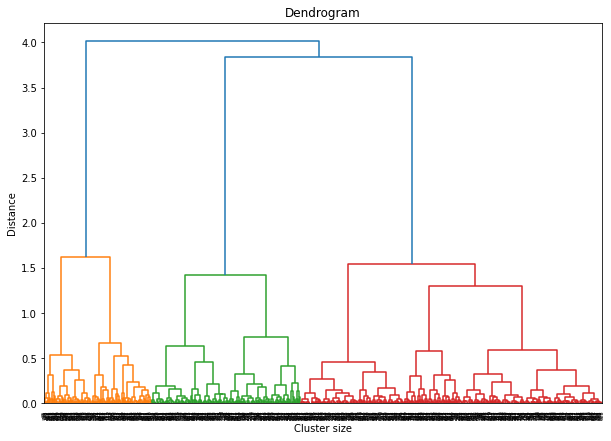

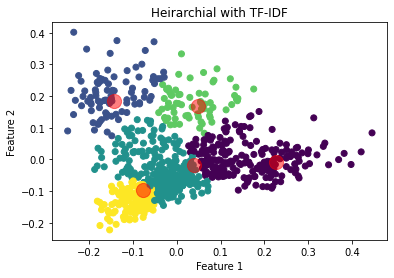

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Ploting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters since 5 books dataset 
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)


labels = agg.labels_
agg.fit_predict(X_pca_test)
print("==============================================================================================")
 


# Ploting the the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with TF-IDF")
plt.show()

predicted_labels = agg.fit_predict(X_pca_test)

In [41]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with TF-IDF ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with TF-IDF ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with TF-IDF:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with TF-IDF  0.35296412334041954
_________________________________________________________________________
kappa for Heirarchial with TF-IDF  0.0055074744295829925
_________________________________________________________________________
Coherence for Heirarchial with TF-IDF: 0.24778629406455746
_________________________________________________________________________


#WORD EMBEDDING 

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

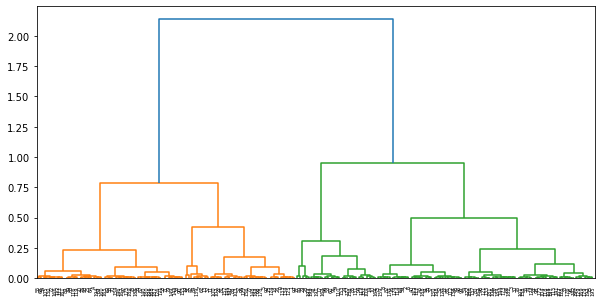

In [43]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


data = pd.read_csv("book_partitions.csv")



# Training  word2vec model
sentences = [doc.split() for doc in X_train]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Getting  document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(doc_vectors)

sentences = [doc.split() for doc in X_test]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Getting document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

X_pca_test = pca.fit_transform(doc_vectors)


# Clustering with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)
kmeans_labels = kmeans.labels_
km_predicted_labels = kmeans.predict(X_pca_test)

# Clustering with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(X_pca_train)
gmm_labels = gmm.predict(X_pca_train)
gmm_predicted_labels = gmm.predict(X_pca_test)

# Clustering with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()



In [44]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, kmeans_labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, km_predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, km_predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  0.3599840049492937
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.07946646627841436
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.02478515075519516
_________________________________________________________________________


In [45]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  -0.07518476846062257
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.0055074744295829925
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.24778629406455746
_________________________________________________________________________


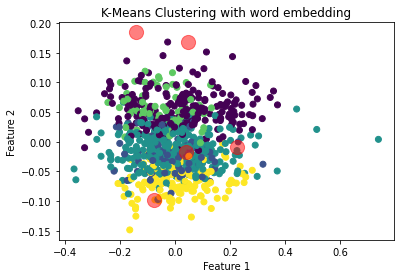

In [46]:

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with word embedding')
plt.show()

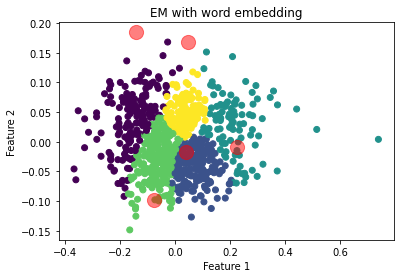

In [47]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Getting the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with word embedding')
plt.show()

#LDA 

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Coherence K-means with LDA: 0.6479494860557371
Coherence GMM with LDA: 0.24494346066121908
Coherence Hierarchical with LDA: 0.5863877795655985
______________________________________________________________________________________
Kappa K-means with LDA: 0.008750000000000036
Kappa GMM with LDA: -0.05750000000000011
Kappa Hierarchical with LDA : 0.07374999999999998
______________________________________________________________________________________
Silhouette K-means with LDA: 0.6479494860557371
Silhouette GMM with LDA: 0.24494346066121908
Silhouette Hierarchical with LDA: 0.5863877795655985
______________________________________________________________________________________


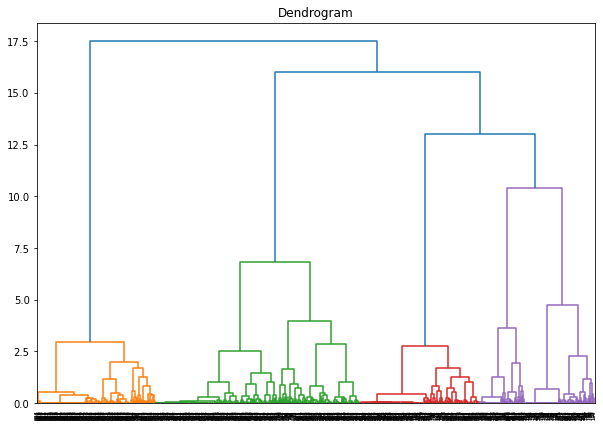

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('book_partitions.csv')

# Converting the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Performing LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transforming to topics
topics = lda.transform(bow)

# Runing K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
#kmeans.predict()
# Runing Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Runing Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)
# Ploting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(topics, method='ward'))

# Calculating coherence
coherence_kmeans = silhouette_score(topics, kmeans.labels_)
coherence_gmm = silhouette_score(topics, gmm.predict(topics))
coherence_agg = silhouette_score(topics, agg.labels_)

# Calculating kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(topics))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculating silhouette
silhouette_kmeans = silhouette_score(topics, kmeans.labels_)
silhouette_gmm = silhouette_score(topics, gmm.predict(topics))
silhouette_agg = silhouette_score(topics, agg.labels_)

# Printing the results
print("Coherence K-means with LDA:", coherence_kmeans)
print("Coherence GMM with LDA:", coherence_gmm)
print("Coherence Hierarchical with LDA:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means with LDA:", kappa_kmeans)
print("Kappa GMM with LDA:", kappa_gmm)
print("Kappa Hierarchical with LDA :", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means with LDA:", silhouette_kmeans)
print("Silhouette GMM with LDA:", silhouette_gmm)
print("Silhouette Hierarchical with LDA:", silhouette_agg)
print("______________________________________________________________________________________")




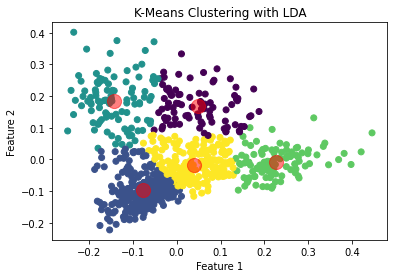

In [51]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Geting the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with LDA')
plt.show()

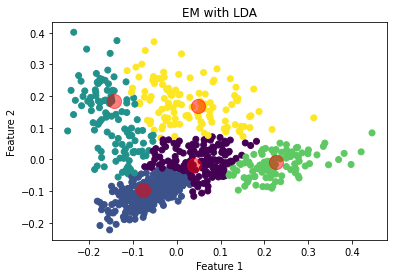

In [52]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Geting the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Ploting the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with LDA')
plt.show()

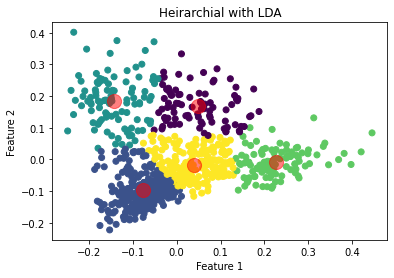

In [53]:
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with LDA")
plt.show()

====TEST DATA CLUSTER====


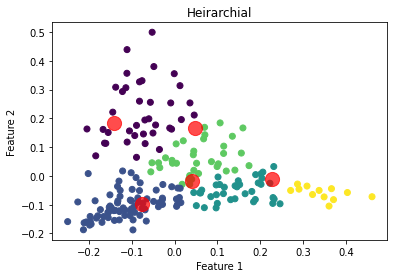

In [54]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

#ERROR ANALYSIS 

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('book_partitions.csv')

# Converting the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Performing LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transforming to topics
topics = lda.transform(bow)

# Runing K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
#kmeans.predict()
# Runing Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Runing Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)



AgglomerativeClustering(n_clusters=5)

In [56]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-56-f510ee5b3d00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-f510ee5b3d00>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-f510ee5b3d00>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-f510ee5b3d00>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [57]:
df['actual_label']=data['label']
df['predicted_label']=kmeans.labels_

In [58]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions :",count)

The number of wrong predictions : 27


In [59]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:200]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for Moby Dick:",count)

The number of wrong predictions for Moby Dick: 17


In [60]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:400]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for The Parent's Assistant:",count)

The number of wrong predictions for The Parent's Assistant: 19


In [61]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:600]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for The Man Who Was Thursday:",count)

The number of wrong predictions for The Man Who Was Thursday: 25


In [62]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:800]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for the book EMMA :",count)

The number of wrong predictions for the book EMMA : 27


In [63]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:1000]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for the book The Tragedy of Hamlet :",count)

The number of wrong predictions for the book The Tragedy of Hamlet : 27



 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : Moby Dick



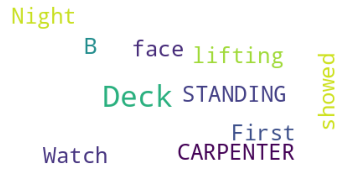


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Parent's Assistant



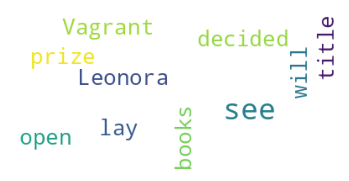


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Man Who Was Thursday



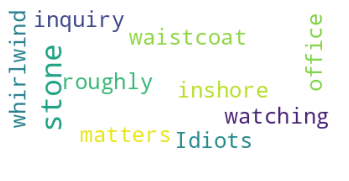


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : Emma



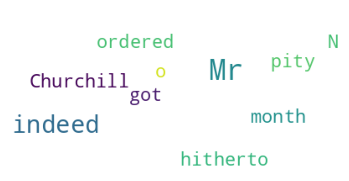


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Tragedie of Hamlet



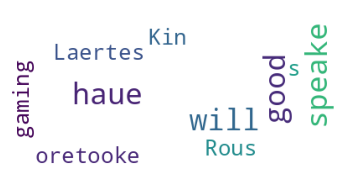

In [64]:
#plotting the words that threw our machine off 
import wordcloud

for label in data['Book Name'].unique():
  books = data[data["Book Name"]==label]["Text"]

  #wordcloud 
  print(f"\n WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=10, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()